# Assignment 1. Python and libraries

**Deadline**: January 20, 9pm.

**Late Penalty**: See Syllabus

**TAs**: Andrew Jung

Welcome to the first assignment of APS360! This assignment 
is a warm up to get you used to the programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The assignment must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this assignment, you should be able to:

1. Set up the computing environment used in this course:
   the Python language interpreter, Jupyter Notebook, and
   the PyCharm Integraded Development Environment (IDE)
2. Write basic, object-oriented Python code.
3. Be able to perform matrix operations using `numpy`.
4. Be able to plot using `matplotlib`.
5. Be able to load, process, and visualize image data.

### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-4. **Do not submit any other files produced by your code.**

Completing this assignment using Jupyter Notebook is highly recommended
(though not necessarily for all subsequent assignments). If you are using
Jupyter Notebook, you can export a PDF file using the menu option
`File -> Download As -> PDF via LaTeX (pdf)`

## Part 0. Environment Setup; Readings

Your first step is to set up your development environment.
We'll be using the **Anaconda** distribution of Python 3.6.
Following the instructions to install Python3.6, PyCharm, 
Jupyter Notebook:

https://www.cs.toronto.edu/~lczhang/360/files/install.pdf

To prepare for the rest of the assignment, the preparatory
readings in section 2 of the installation instructions are
very helpful.

## Part 1. Python Basics [6 pt]

The purpose of this section is to get you used to the 
basics of Python, including working with functions, numbers,
lists, and strings.

### Part (a) -- 3pt

Write a function `sum_of_squares` that computes the sum of squares up to `n`.

In [14]:
def sum_of_squares(n):
    sum = 0
    for i in range (1,n+1):
        sum = i*i + sum 
    
    return sum
    """Return the sum (1 + 2^2 + 3^2 + ... + n^2)
    
    Precondition: n > 0, type(n) == int
    
    >>> sum_of_squares(3)
    14
    >>> sum_of_squares(1)
    1
    """
    
sum_of_squares(3)

14

### Part (b) -- 3pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or checkout https://docs.python.org/3.6/library/stdtypes.html#str.split

In [4]:
help(str.split)

Help on method_descriptor:

split(...)
    S.split(sep=None, maxsplit=-1) -> list of strings
    
    Return a list of the words in S, using sep as the
    delimiter string.  If maxsplit is given, at most maxsplit
    splits are done. If sep is not specified or is None, any
    whitespace string is a separator and empty strings are
    removed from the result.



In [8]:
def word_lengths(sentence):
    words= sentence.split(" ")
    result = []
    for i in words:
        result.append(len(i))
    return result
    """Return a list containing the length of each word in
    sentence.
    
    >>> word_lengths("welcome to APS360!")
    [7, 2, 7]
    >>> word_lengths("machine learning is so cool")
    [7, 8, 2, 2, 4]
    """
word_lengths("welcome to APS360!")

[7, 2, 7]

## Part 2. NumPy Exercises [9 pt]

In this part of the assignment, you'll be manipulating arrays 
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [23]:
import numpy as np

### Part (a) -- 1pt

Load the file `matrix.csv` into a variable called `matrix` using the function `np.loadtxt`. Make sure that `matrix.csv` is in **the same file folder** as this notebook.

In [57]:
matrix = np.loadtxt("matrix.csv", delimiter =",")

In [58]:
matrix

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

### Part (b) -- 1pt

Load the file `vector.npy` into a variable called `vector` using the function `np.load`. As before, make sure that `vector.npy` is in **the same file folder** as this notebook.

In [70]:
vector = np.load("vector.npy")
vector = vector.astype(np.float)

In [71]:
vector

array([[10.],
       [20.],
       [15.]])

### Part (c) -- 3pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.

Hint: be mindful of the dimension of output

In [139]:
output_list =[]
for i in range(len(matrix)):
    current_R = []
    for j in range(len(vector[0])):
        current_sum = 0
        for k in range(len(vector)):
            current_sum += matrix[i][k]*vector[k][j]
        current_R.append(current_sum)
    output_list.append(current_R)
output = np.array(output_list)
  


In [140]:
output

array([[ 95.],
       [230.],
       [365.]])

### Part (d) -- 1pt

Save the `output` variable into a csv 
file called `output_forloop.csv` using the function `numpy.savetxt`.

In [79]:
np.savetxt("output_forloop.csv",output)

### Part (e) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [80]:
output2 = np.dot(matrix,vector)

In [81]:
output2

array([[ 95.],
       [230.],
       [365.]])

### Part (f) -- 1pt

Save the `output2` variable into a csv 
file called `output_dot.npy` using the function `numpy.save`.

In [98]:
np.save("output_dot.npy",output2)

### Part (g) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [141]:
print(output)
print(output2)

[[ 95.]
 [230.]
 [365.]]
[[ 95.]
 [230.]
 [365.]]


## Part 3. Callable Objects [12 pt]

A *callable object* is any object that can be called like a function.
In Python, any object whose class has a `__call__` method will be callable. 
For example, we can define an `AddBias` class that is initialized with a value `val`. When the object of the Adder class is called with `input`, it will return the sum of `val` and `input`:

In [102]:
class AddBias(object):
    def __init__(self, val):
        self.val = val
    def __call__(self, input):
        return self.val + input

In [103]:
add4 = AddBias(4)
add4(3)

7

In [104]:
# AddBias works with numpy arrays as well

add1 = AddBias(1)
add1(np.array([3,4,5]))

array([4, 5, 6])

### Part (a) -- 2pt

Create a callable object class `ElementwiseMultiply` that is initialized with `weight`, which is a numpy array (with 1-dimension). 
When called on `input` of **the same shape** as `weight`, the object will output an elementwise product of `input` and `weight`. For example, the 1st element in the output will be a product of the first element of `input` and first element of `weight`. If the `input` and `weight` have different shape, do not return anything.

In [175]:
class ElementwiseMultiply(object):
    def __init__(self,weight):
        self.weight = weight
    def __call__(self, input):
        if(len(input)==len(self.weight)):
            return np.multiply(input, self.weight)
    

### Part (b) -- 4pt

Create a callable object class `LeakyRelu` that is initialized
with `alpha`, which is a scalar value. 
When called on `input`, which may be a NumPy array, 
the object will output:

* $f(x) = x$ if $x \ge 0$
* $f(x) = \alpha x$ if $x < 0$

To obtain full marks, do **not** use any for-loops to implement this class.

In [144]:
class LeakyRelu(object):
    def __init__(self,alpha):
        self.alpha = alpha
    def __call__(self, input):
        input_a = np.array(input, dtype = 'float64')
        input_a[input_a<0]*=self.alpha
        return input_a

### Part (c) -- 4pt

Create a callable object class `Compose` that is initialized with `layers`, which is a list of callable objects each taking in one argument when called. For example, `layers` can be something like `[add1, add4]` that we created above. Each `add1` and `add4` take in one argument. When `Compose` object is called on **a single argument**, the object will output a composition of object calls in `layers`, in the order given in `layers` (e.g. `add1` will be called first and then `add4` will be called after using the result from `add1` call)

In [145]:
class Compose(object):
    def __init__(self, layers=[]):
        self.layers = layers
    def __call__(self, input):
        cur_input = input
        for s in self.layers:
            cur_result = s(cur_input)
            cur_input =  cur_result
        return cur_input
        

### Part (d) -- 2pt

Run the below code and include the output in your report.

In [176]:
weight_1 = np.array([1, 2, 3, 4])
weight_2 = np.array([-1, -2, -3, -4])
bias_1 = 3
bias_2 = -2
alpha = 0.1

elem_mult_1 = ElementwiseMultiply(weight_1)
add_bias_1 = AddBias(bias_1)
leaky_relu = LeakyRelu(alpha)
elem_mult_2 = ElementwiseMultiply(weight_2)
add_bias_2 = AddBias(bias_2)
layers = Compose([elem_mult_1, 
                  add_bias_1, 
                  leaky_relu,
                  elem_mult_2, 
                  add_bias_2, 
                  leaky_relu])

input = np.array([10, 5, -5, -10])
print("Input: ", input)

output = layers(input)
print("Output:", output)

Input:  [ 10   5  -5 -10]
Output: [-1.5 -2.8  1.6 12.8]


## Part 4. Images [13 pt]

A picture or image can be represented as a NumPy array of “pixels”, 
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects. You’ll need the file `dog_mochi.png` from the same place you downloaded this assignment. Save the output images in the same directory as the Jupyter Notebook.

In [105]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

Load the image `dog_mochi.png` into the variable `img` using the `pyplot.imread` function.
This is a photograph of a dog whose name is Mochi.

In [156]:
img = plt.imread("dog_mochi.png")

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`. 

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction, 
and the second dimension indicates the X (column) dimension.

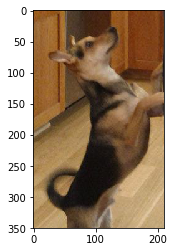

In [157]:
plt.imshow(img)

### Part (c) -- 2pt

What is the pixel coordinate of Mochi's eye? 
Show the value of each of the 3 channels on a pixel cooresponding to Mochi's eye.

The value for each channel in the original image ranges from 0 (darkest) to 255 (lightest). However, when loading an image through Matplotlib, this range will be scaled to be from 0 (darkest) to 1 (brightest) instead, and will be a real number, rather than an integer.

In [158]:
img[100,50]

array([0.58431375, 0.41568628, 0.2509804 , 1.        ], dtype=float32)

### Part (d) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels 
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1] 
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the 
closest endpoint. Display the image using `plt.imshow`.

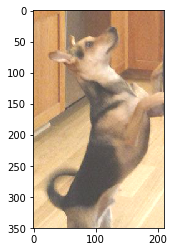

In [162]:
img_add = img+0.25
np.clip(img_add, 0, 1, out = img_add)
plt.imshow(img_add)

### Part (e) -- 3pt

From the original image, create three images that separate out the three 
colour channels (red, green and blue).

Hint: First create an array initialized with zeros, then copy over the specific channel’s 2D content from img.

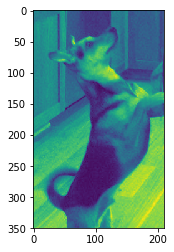

In [166]:
red_im = img[:, :, 0]
blu_im = img[:,:,1]
gren_im = img[:,:,2]

#plt.imshow(red_im)
#plt.imshow(blu_im)
#plt.imshow(gren_im)

### Part (f) -- 3pt

Crop the image to only show Mochis face. Your image should be square. 
Display the image.

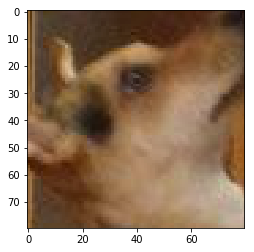

In [168]:
img_face = img[30:110,50:130,:]
plt.imshow(img_face)

### Part (g) -- 1pt

Finally, save the image from part (f) using `plt.imsave` as the filename `dog_name.png`.

In [169]:
plt.imsave("dog_name.png",img_face)